In [80]:
import numpy as np
import cv2
import  matplotlib.pyplot as plt
import os

root_dir = os.path.abspath("../")

img = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--BFP.tif")
img2 = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--DsRed.tif")
img3 = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--eGFP.tif")
img4 = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--miRFP.tif")

images = [img, img2, img3, img4]
eq_imgs = []

def histogram_equalization(img_in):
    # segregate color streams
    #image = cv2.imread(img_in)
    #b,g, r = img_in
    b,g,r =  cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf
    cdf_b = np.cumsum(h_b)
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)

# mask all pixels with value=0 and replace it with mean of the pixel values
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_out = cv2.merge((img_b, img_g, img_r))
# validation
   #equ_b = cv2.equalizeHist(b)
   #equ_g = cv2.equalizeHist(g)
   #equ_r = cv2.equalizeHist(r)
   #equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out


for x in images:
    cv2.imshow("image" + str(x), cv2.resize(x,(250,250)))
    hqImg = histogram_equalization(x)
    eq_imgs.append(hqImg)
    cv2.imshow("histImage" + str(x), cv2.resize(hqImg,(250,250)))



#cv2.imshow("image1", cv2.resize(img,(250,250)))
#cv2.imshow("image2", cv2.resize(img2,(250,250)))
#cv2.imshow("image3", cv2.resize(img3,(250,250)))
#cv2.imshow("image4", cv2.resize(img4,(250,250)))
cv2.waitKey(0)
cv2.destroyAllWindows()



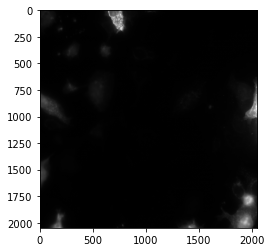

In [18]:
def COl2Gray(image):
    b,g,r = cv2.split(image)

    b = b/255
    g = g/255
    r = r/255

    image = cv2.merge((b,g,r))

    return  image

img = COl2Gray(img)
plt.imshow(img)

In [38]:
#gabor values
#ksize = 50 #for some reason 50 works? forgot our input image is big
sigma = 3
theta = 1*np.pi/4
lamda = 1*np.pi/4  #1/4 works best for angled.
gamma = .78 #.5 and .78 yields results
phi = 0
filters = []

for sigma in range(3,6,2):
    for x in range(1,4,2):
        theta = x*np.pi/4
        for y in range(1, 3):
            gamma = float(y)/2.0
            kernel = cv2.getGaborKernel((50,50), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
            filters.append(kernel)
            print(sigma,theta, gamma)
            cv2.imshow("image"+str(sigma)+str(theta)+str(gamma), kernel)
        #cv2.imshow("image"+str(sigma)+str(theta), kernel_images[x])
cv2.waitKey(0)
cv2.destroyAllWindows()

3 0.7853981633974483 0.5
3 0.7853981633974483 1.0
3 2.356194490192345 0.5
3 2.356194490192345 1.0
5 0.7853981633974483 0.5
5 0.7853981633974483 1.0
5 2.356194490192345 0.5
5 2.356194490192345 1.0


In [28]:
fimg = cv2.filter2D(img, cv2.CV_8UC3, filters[1])
cv2.imshow("filter", cv2.resize(filters[0],(250,250)))
cv2.imshow("image", cv2.resize(img, (250,250)))
cv2.imshow("filter"+str(x),cv2.resize( fimg,(250,250)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [82]:
filtered_images = []
filtered_images2 = []
filtered_images3 = []
filtered_images4 = []

for x in range(len(filters)):
    #fimg = cv2.filter2D(img,cv2.CV_8UC3, kernel )
   # _fimg = cv2.filter2D(img, cv2.CV_8UC3, filters[x])
    filtered_images.append(cv2.filter2D(eq_imgs[0], cv2.CV_8UC3, filters[x]))
    filtered_images2.append(cv2.filter2D(eq_imgs[1], cv2.CV_8UC3, filters[x]))
    filtered_images3.append(cv2.filter2D(eq_imgs[2], cv2.CV_8UC3, filters[x]))
    filtered_images4.append(cv2.filter2D(eq_imgs[3], cv2.CV_8UC3, filters[x]))

#cv2.imshow("filter1",cv2.resize( filtered_images[5],(250,250)))
#cv2.imshow("filter2",cv2.resize( filtered_images2[5],(250,250)))
#cv2.imshow("filter3",cv2.resize( filtered_images3[5],(250,250)))
#cv2.imshow("filter4",cv2.resize( filtered_images4[5],(250,250)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [99]:
## Horizontal Concatenation
h1 = cv2.resize(img,(250,250))
#cv2.imshow(str(h1), h1)
h2= cv2.resize(eq_imgs[0],(250,250))
#cv2.imshow(str(h2), h2)
h3= cv2.resize(filtered_images[0],(250,250))
#cv2.imshow(str(h3), h3)
h4= cv2.resize(filtered_images[1],(250,250))
#cv2.imshow(str(h4), h4)

h_img = cv2.hconcat([h1,h2])
#cv2.imshow(str(h_img), h_img)
h_img = cv2.hconcat([h_img,h3])

h_img = cv2.hconcat([h_img,h4])
cv2.imshow("mix", h_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def make_h_image():


In [66]:
# Set threshold and maxValue

thresh = 240
maxValue = 255

# Basic threshold example
for x in range(len(filtered_images)):

    th, dst = cv2.threshold(filtered_images[x], thresh, maxValue, cv2.THRESH_BINARY);
    if(x == 0):
        sum_image = filtered_images[0]
    else:
        sum_image = filtered_images[x]
        dst = cv2.add(sum_image, dst)
    cv2.imshow("thresh"+str(x),cv2.resize(dst, (250,250)))


#cv2.imshow("filter"+x,cv2.resize(filtered_images[0], (250,250)))
cv2.imshow("sum",cv2.resize(sum_image, (250,250)))
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Gabor Kernel Resized')

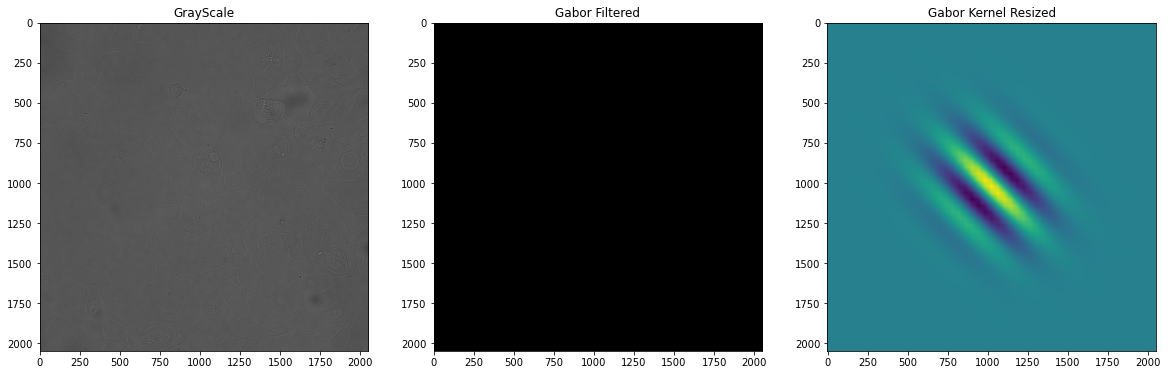

In [19]:
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (2048,2048))

fig, ax = plt.subplots(1,3, figsize=(20,10))

ax[0].imshow(img)
ax[0].set_title("GrayScale")

ax[1].imshow(fimg)
ax[1].set_title("Gabor Filtered")

ax[2].imshow(kernel_resized)
ax[2].set_title("Gabor Kernel Resized")

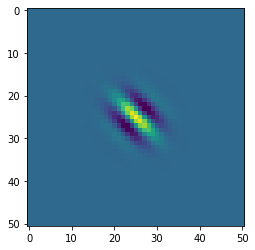

In [29]:
img = cv2.imread(root_dir + "/Input/Images/--W00001--P00004--Z00000--T00000--DsRed.tif")

sigma = 3 #Large sigma on small features will fully miss the features.
theta2 = 1 *np.pi/4#/4 shows horizontal 3/4 shows other horizontal. Try other contributions
theta = 3 *np.pi/4
lamda = 1*np.pi /4  #1/4 works best for angled.
gamma=0.75  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0.
kernel = cv2.getGaborKernel((50,50), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
kernel2 =  cv2.getGaborKernel((50,50), sigma, theta2, lamda, gamma, phi, ktype=cv2.CV_32F)
plt.imshow(kernel)

In [67]:
fimg = cv2.filter2D(img,cv2.CV_8UC3, kernel )
fimg2 = cv2.filter2D(img,cv2.CV_8UC3, kernel2 )
cv2.imshow("image", cv2.resize(img, (250,250)))
cv2.imshow("filter"+str(1),cv2.resize(fimg, (250,250)))
cv2.imshow("filter"+str(2),cv2.resize(fimg2, (250,250)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
def split_merge_8channels(imgs):
    r_ = 0
    g_ = 0
    b_ = 0
    for x in range(len(imgs)):
        r1,g1,b1 = cv2.split(imgs[x])
        r_+= r1
        g_+= g1
        b_+= b1

    r_out = (r_)/len(imgs)
    g_out = (g_)/len(imgs)
    b_out = (b_)/len(imgs)

    r_out = r_out/255
    g_out = g_out/255
    b_out = b_out/255

    image = cv2.merge((r_out,g_out,b_out))
    return  image

def add_merge(input1,inpu2):
    output = cv2.add(input1,inpu2)
    return  output

def split_merge_channels(input1, input2):
    r1,g1,b1 = cv2.split(input1)
    r2,g2,b2 = cv2.split(input2)

    r_out = (r1+r2)/2
    g_out = (g1+g2)/2
    b_out = (b1+b2)/2

    r_out = r_out/255
    g_out = g_out/255
    b_out = b_out/255

    image =cv2.merge((r_out,g_out,b_out))
    return  image

merged_image = split_merge_channels(filtered_images[1],filtered_images[4])
cv2.imshow("image", cv2.resize(img, (500,500)))
#cv2.imshow("filter"+str(1),cv2.resize(fimg, (500,500)))
#cv2.imshow("filter"+str(2),cv2.resize(fimg2, (500,500)))
cv2.imshow("merge",cv2.resize(merged_image, (500,500)))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [49]:
merged_image = add_merge(filtered_images[0],filtered_images[1])
cv2.imshow("merge0",cv2.resize(filtered_images[0], (500,500)))
cv2.imshow("merge1",cv2.resize(filtered_images[1], (500,500)))
cv2.imshow("mergeFinal",cv2.resize(merged_image, (500,500)))
cv2.waitKey(0)
cv2.destroyAllWindows()